# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.002
0.0
0.001
-0.001
0.0
0.0
0.0
0.003
0.002
-0.001
0.003
0.003
0.003
0.0
0.0
0.0
0.0
0.0
0.0
0.002
0.002
0.0
-0.001
0.001
-0.003
-0.002
0.001
-0.001
0.001
0.003
0.001
-0.001
0.0
0.001
0.002
0.004
-0.001
-0.001
-0.002
-0.003
-0.001
-0.001
0.0
0.0
0.998
0.998
0.994
0.994
1.982
1.982
1.978
1.978
1.981
2.981
2.981
2.977
2.977
3.975
3.975
3.975
3.975
4.973
4.975
4.978
4.977
4.977
5.977
5.973
5.973
6.712
6.715
6.715
6.716
6.716
7.491
7.491
7.488
7.489
8.485
8.485
8.485
8.484
9.483
9.48
9.481
9.48
10.478
10.478
10.476
10.477
11.475
11.474
11.473
11.473
12.473
12.47
12.472
12.47
13.469
13.469
13.469
14.116
14.119
14.122
14.121
14.12
14.773
14.773
14.771
14.772
15.769
15.769
16.766
16.766
16.765
16.765
17.747
17.748
17.75
17.747
17.747
18.748
18.747
18.744
18.743
19.744
19.74
19.74
19.742
20.736
20.736
20.736
21.468
21.468
21.472
22.219
22.22
22.22
22.219
23.202
23.195
23.196
23.197
24.2
24.197
24.195
24.195
25.197
25.196
25.195
26.196
26.195
26.194
27.185
27.182
27.182
27.182
28.182
28.182


57.602
57.601
57.6
57.6
57.601
57.66
57.694
57.732
57.767
57.804
57.805
57.849
57.882
57.881
57.881
57.879
57.879
57.881
57.882
57.88
57.878
57.881
57.879
57.877
57.878
57.878
57.878
57.876
57.88
57.879
57.877
57.878
57.879
57.879
57.879
57.876
57.878
57.876
57.876
57.876
57.875
57.873
57.873
57.873
57.873
57.875
57.877
57.878
57.877
57.875
57.875
57.874
57.874
57.872
57.874
57.874
57.874
57.874
57.874
57.867
57.864
57.866
57.867
57.867
57.893
58.023
58.023
58.024
58.047
58.044
58.046
58.045
58.044
58.054
58.054
58.055
58.054
58.055
58.057
58.056
58.056
58.05
58.054
58.054
58.054
58.054
58.057
58.057
58.057
58.056
58.058
58.053
58.05
58.05
58.05
58.053
58.049
58.049
58.052
58.05
58.051
58.051
58.048
58.047
58.049
58.05
58.049
58.049
58.048
58.048
58.048
58.046
58.046
58.046
58.046
58.045
58.074
58.106
58.141
58.177
58.177
58.177
58.177
58.196
58.197
58.195
58.194
58.193
58.193
58.193
58.195
58.193
58.192
58.193
58.191
58.194
58.197
58.194
58.194
58.194
58.195
58.193
58.191
58.191
58.19

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.002
1,2,0.000
2,4,0.001
3,6,-0.001
4,8,0.000
...,...,...
1526,3052,59.848
1527,3054,59.848
1528,3056,59.849
1529,3058,59.849


<IPython.core.display.Javascript object>


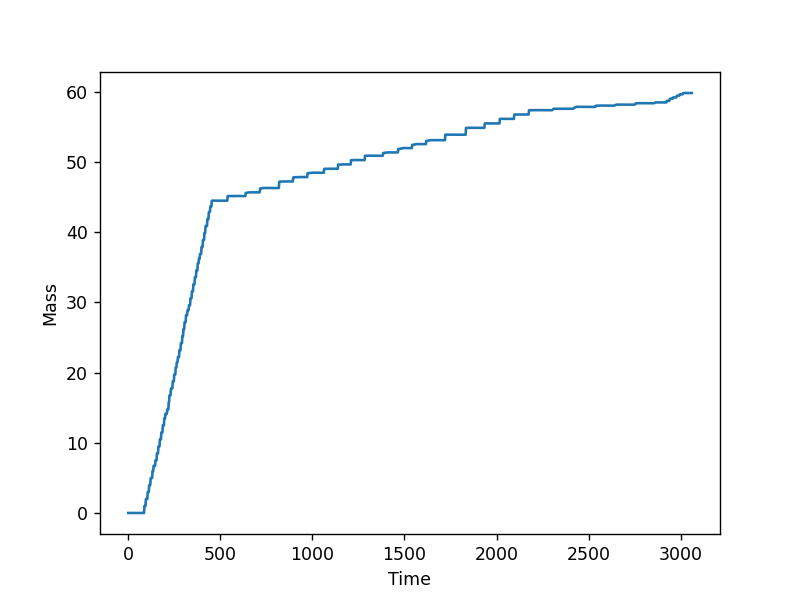

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_070323_S133-138.csv')